天井近くにスピーカー設置して反射込のスペクトル確認する


In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import (
    get_tukey_spectrum_amplitude,
    get_sn_amplitude,
)
from positioning.sound_db import TukeyDB
from positioning import tools

In [3]:
plt.style.use(["science", "notebook"])

In [4]:
true_pos = pd.read_csv("../data/reflect-ceiling-first/measure-points.csv")

(0.0, 2.5)

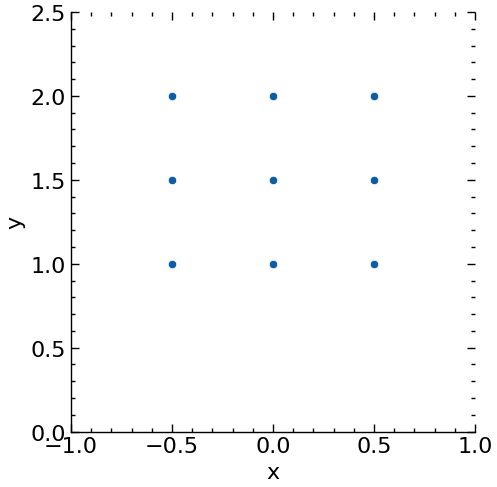

In [5]:
sns.relplot(data=true_pos, x="x", y="y")
plt.xlim(-1, 1)
plt.ylim(0, 2.5)

In [6]:
signals = [
    readwav(f"../data/reflect-ceiling-first/p{i}.wav")[:, 1] for i in range(1, 10)
]

In [7]:
spectrum = []
amplitude = []
for s in signals:
    spec = []
    ampli = []
    for i in range(10):
        sp, amp = get_tukey_spectrum_amplitude(
            s[i * 96000 : (i + 2) * 96000],
            first_freq=15000,
            last_freq=22000,
            ampli_band="all",
        )
        spec.append(sp)
        ampli.append(amp)
    spectrum.append(spec)
    amplitude.append(ampli)

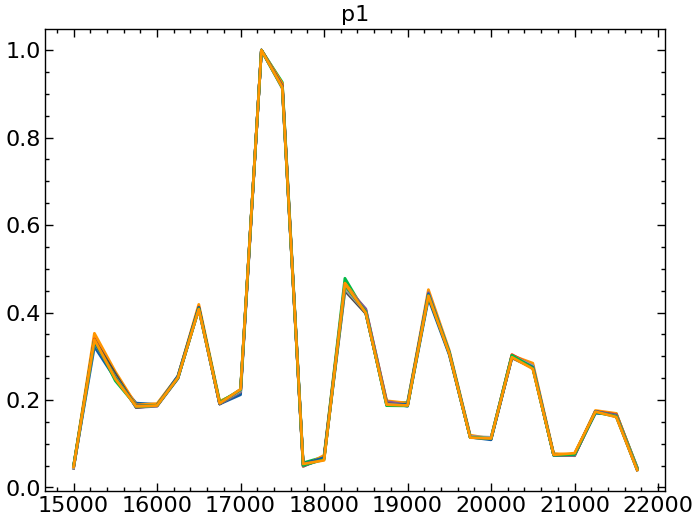

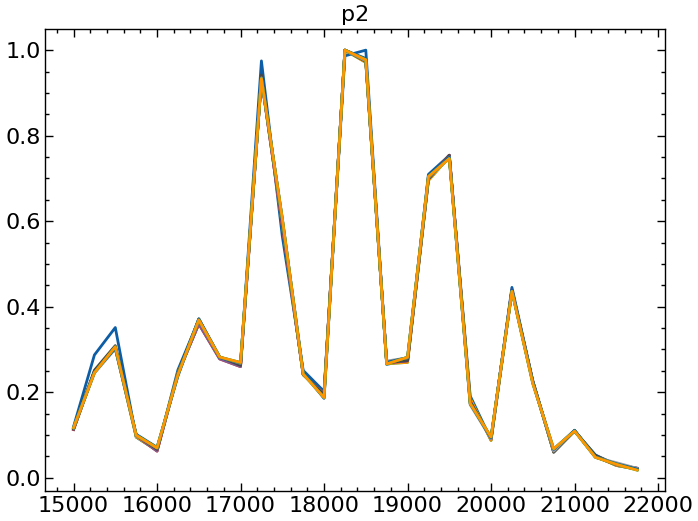

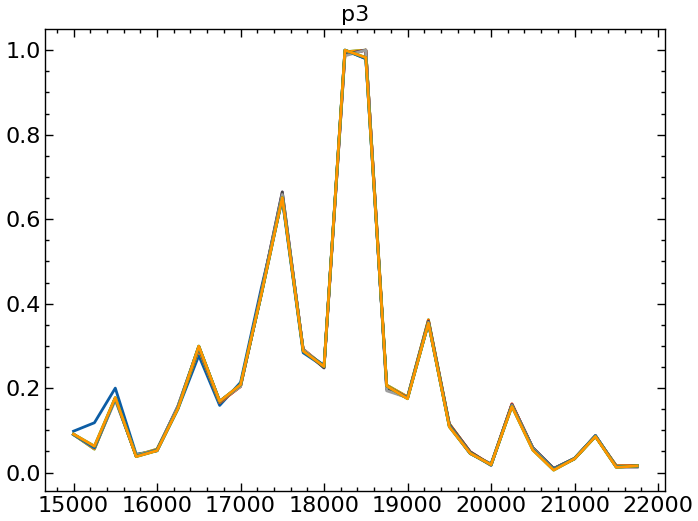

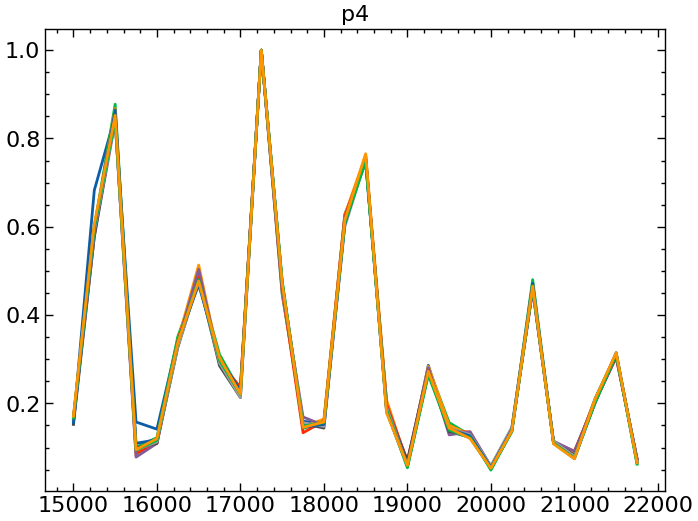

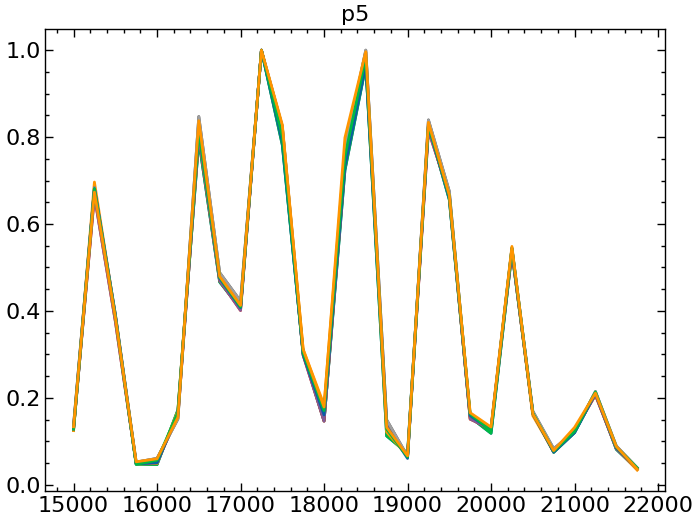

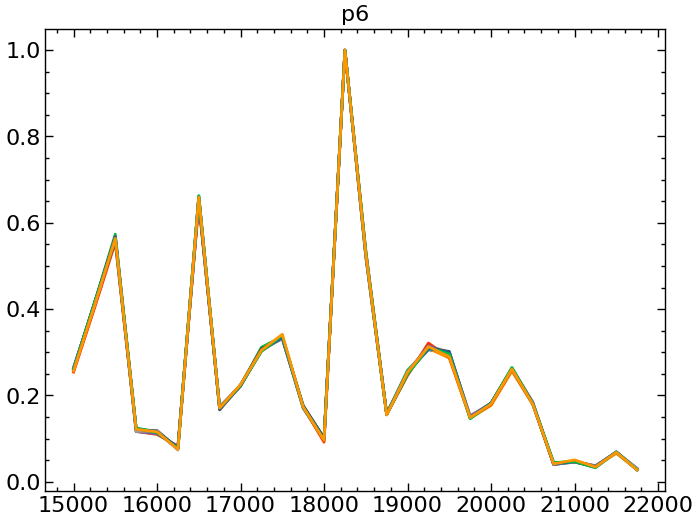

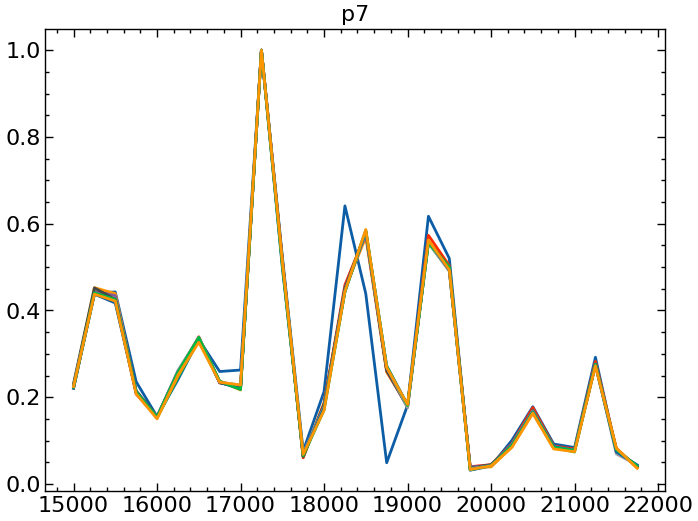

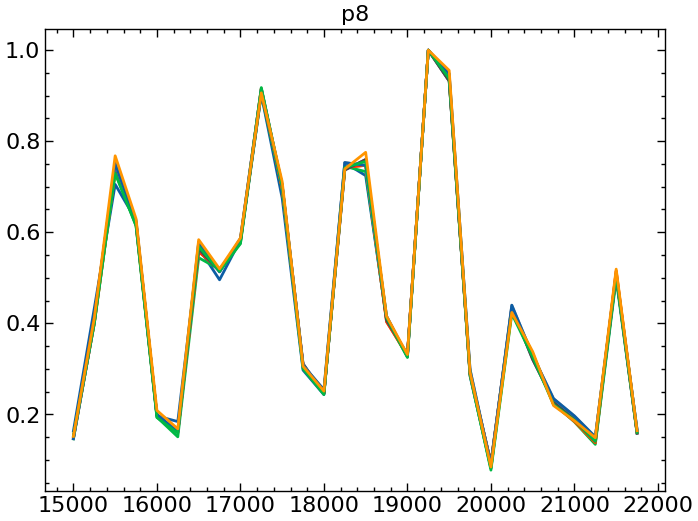

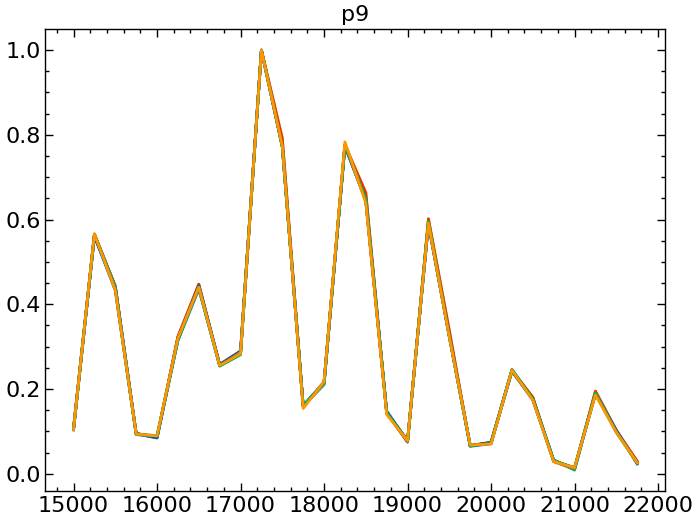

In [8]:
for i, spec in enumerate(spectrum):
    for s in spec:
        sns.lineplot(x=np.arange(15000, 22000, (22000 - 15000) / len(s)), y=s)
    plt.title(f"p{i+1}")
    plt.show()

In [9]:
signal_noise = np.array(
    [get_sn_amplitude(signals[1][i * 96000 : (i + 2) * 96000]) for i in range(100)]
)

In [10]:
signal_noise_avg = np.mean(signal_noise, axis=0)
snr = []
for i in range(7):
    snr.append(tools.get_snr(signal_noise_avg[i, 0], signal_noise_avg[i, 1]))
print(snr)

[45.649968512417075, 47.47946615243265, 53.11982934435464, 55.12296617534558, 52.60759922502831, 44.856918794046095, 29.519679540421304]
